# Data visualization with Matplotlib

### Visualization of the covid-19 data set (march 21st) with Matplotlib

In [2]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
with open("covid_19_data.csv", 'r') as f:
    data = csv.DictReader(f)
    countries =[]
    for i in data:
        if i["Country/Region"] not in countries:
            countries.append(i["Country/Region"])
            
print("Total countries:", len(countries))

Total countries: 171


Above shows the total number of Countries with a recorded case of Covid-19. A total of 171 Countries.

In [3]:
with open("covid_19_data.csv", 'r') as f:
    data = csv.DictReader(f)
    total_cases =[0, 0, 0]
    for i in data:
        total_cases[0]+=float(i["Confirmed"])
        total_cases[1]+=float(i["Deaths"])
        total_cases[2]+=float(i["Recovered"])
cases = ["Confirmed", "Deaths", "Recovered"]
total_cases

[3629156.0, 116833.0, 1357313.0]

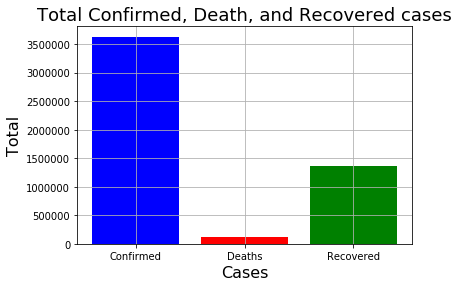

In [4]:
plt.bar(cases, total_cases, color=["blue", "red", "green"])
plt.title("Total Confirmed, Death, and Recovered cases", fontsize=18)
plt.xlabel("Cases", fontsize=16)
plt.ylabel("Total", fontsize=16)
plt.grid(True)

Here, with a bar chart, i sumerize the global state of the virus. with over 3.6 Million Confirmed cases, over a hundred thousand deaths, and more than 130,000 recoveries.

In [5]:
from datetime import datetime

In [6]:
with open("covid_19_data.csv", 'r') as f:
    data = csv.DictReader(f)
    date = []
    reported_cases={"Confirmed":[],"Deaths":[],"Recovered":[]}
    for i in data:
        date.append(datetime.strptime(i["ObservationDate"], "%m/%d/%Y"))
        reported_cases["Confirmed"].append(float(i['Confirmed']))
        reported_cases["Deaths"].append(float(i['Deaths']))
        reported_cases['Recovered'].append(float(i['Recovered']))

(array([737446., 737456., 737463., 737470., 737477., 737485., 737492.,
        737499.]),
 <a list of 8 Text xticklabel objects>)

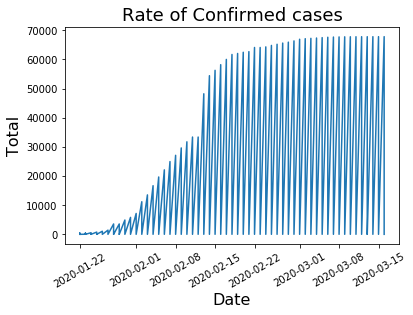

In [7]:
plt.plot(date, reported_cases["Confirmed"])
plt.title("Rate of Confirmed cases", fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Total", fontsize=16)
plt.xticks(rotation=30)

(array([737446., 737456., 737463., 737470., 737477., 737485., 737492.,
        737499.]),
 <a list of 8 Text xticklabel objects>)

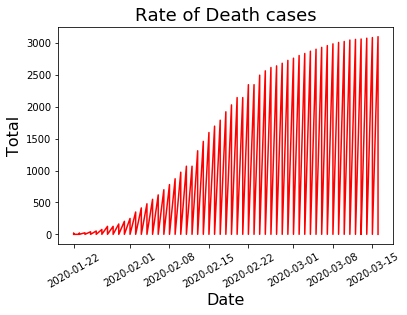

In [8]:
plt.plot(date, reported_cases["Deaths"], 'r')
plt.title("Rate of Death cases",fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Total", fontsize=16)
plt.xticks(rotation=30)

(array([737446., 737456., 737463., 737470., 737477., 737485., 737492.,
        737499.]),
 <a list of 8 Text xticklabel objects>)

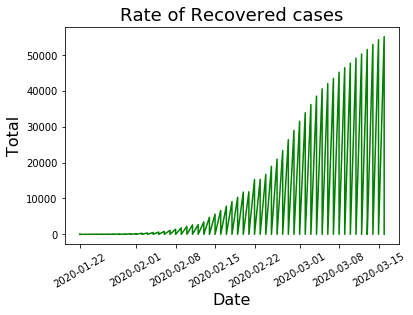

In [21]:
plt.plot(date, reported_cases["Recovered"], 'g',)
plt.title("Rate of Recovered cases", fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Total", fontsize=16)
plt.xticks(rotation=30)

## Top Ten Countries after China with highest recorded cases

In [10]:
with open("covid_19_data.csv", 'r') as f:
    data = csv.DictReader(f)
    x = {}
    for i in data:
        if i["Country/Region"] not in x.keys() and i["Country/Region"] != "Others":
            pair = {i["Country/Region"]: float(i["Confirmed"])}
            x.update(pair)
        elif i["Country/Region"] in x.keys():
            x[i["Country/Region"]]+=float(i["Confirmed"])
                
countries = dict(sorted(x.items(), reverse=True, key=lambda x: x[1]))
countries_topten_c = dict([(list(countries.keys())[i], list(countries.values())[i]) for i in range(1, 11)])
countries_topten_c

{'Italy': 170830.0,
 'South Korea': 121156.0,
 'Iran': 117303.0,
 'Spain': 39259.0,
 'Germany': 32262.0,
 'France': 31282.0,
 'US': 20204.0,
 'Japan': 10817.0,
 'Switzerland': 10251.0,
 'UK': 7473.0}

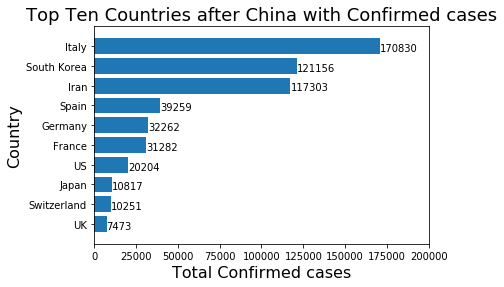

In [11]:
y_pos = [k for k, _ in enumerate(countries_topten_c.values())]
plt.barh(y_pos, countries_topten_c.values())
plt.axis([0, 200000, -1, 10])
plt.gca().invert_yaxis()
plt.yticks(y_pos, countries_topten_c.keys())
plt.title("Top Ten Countries after China with Confirmed cases", fontsize=18)
plt.xlabel("Total Confirmed cases", fontsize=16)
plt.ylabel("Country", fontsize=16)
for k, v in enumerate(countries_topten_c.values()):
    plt.text(v, k+0.25, str(int(v)))
plt.show()

In [12]:
with open("covid_19_data.csv", 'r') as f:
    data = csv.DictReader(f)
    x = {}
    for i in data:
        if i["Country/Region"] not in x.keys() and i["Country/Region"] != "Others":
            pair = {i["Country/Region"]: float(i["Deaths"])}
            x.update(pair)
        elif i["Country/Region"] in x.keys():
            x[i["Country/Region"]]+=float(i["Deaths"])
                
countries = dict(sorted(x.items(), reverse=True, key=lambda x: x[1]))
countries_topten_d = dict([(list(countries.keys())[i], list(countries.values())[i]) for i in range(1, 11)])

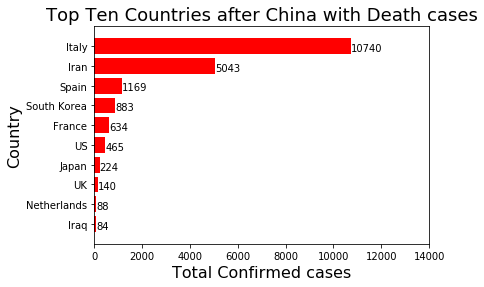

In [13]:
y_pos = [k for k, _ in enumerate(countries_topten_d.values())]
plt.barh(y_pos, countries_topten_d.values(), color=["red"])
plt.axis([0, 14000, -1, 10])
plt.gca().invert_yaxis()
plt.yticks(y_pos, countries_topten_d.keys())
plt.title("Top Ten Countries after China with Death cases", fontsize=18)
plt.xlabel("Total Confirmed cases", fontsize=16)
plt.ylabel("Country", fontsize=16)
for k, v in enumerate(countries_topten_d.values()):
    plt.text(v, k+0.25, str(int(v)))
plt.show()

In [14]:
with open("covid_19_data.csv", 'r') as f:
    data = csv.DictReader(f)
    x = {}
    for i in data:
        if i["Country/Region"] not in x.keys() and i["Country/Region"] != "Others":
            pair = {i["Country/Region"]: float(i["Recovered"])}
            x.update(pair)
        elif i["Country/Region"] in x.keys():
            x[i["Country/Region"]]+=float(i["Recovered"])
                
countries = dict(sorted(x.items(), reverse=True, key=lambda x: x[1]))
countries_topten_r = dict([(list(countries.keys())[i], list(countries.values())[i]) for i in range(1, 11)])

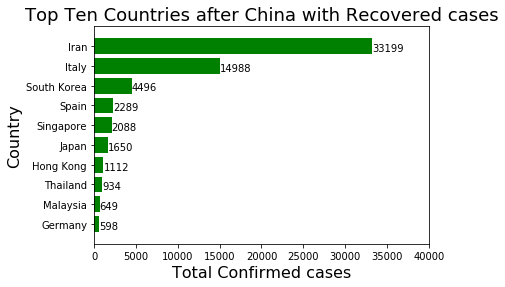

In [15]:
y_pos = [k for k, _ in enumerate(countries_topten_r.values())]
plt.barh(y_pos, countries_topten_r.values(), color=["green"])
plt.axis([0, 40000, -1, 10])
plt.gca().invert_yaxis()
plt.yticks(y_pos, countries_topten_r.keys())
plt.title("Top Ten Countries after China with Recovered cases", fontsize=18)
plt.xlabel("Total Confirmed cases", fontsize=16)
plt.ylabel("Country", fontsize=16)
for k, v in enumerate(countries_topten_r.values()):
    plt.text(v, k+0.25, str(int(v)))
plt.show()

## Comparing the Death and Recovery ratio of the top four countries after China

Text(1.3, 33000, 'Ratio\n1 : 0.03 : 0.06')

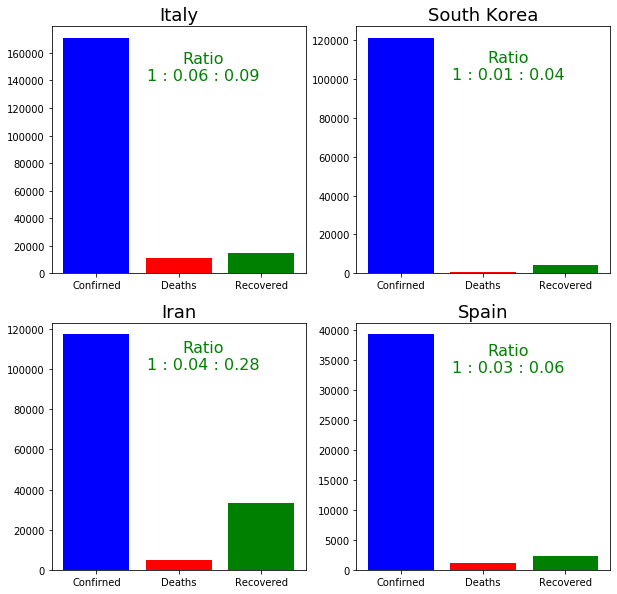

In [16]:
sample = [i for i in list(countries_topten_c.keys())]
n = 4
cases = ["Confirned", "Deaths", "Recovered"]
confirmed = [countries_topten_c[i] for i in sample[:n]]
deaths = [countries_topten_d[i] for i in sample[:n]]
recovered = [countries_topten_r[i] for i in sample[:n]]
ratio_it = f"1 : {round(deaths[0]/confirmed[0], 2)} : {round(recovered[0]/confirmed[0], 2)}"
ratio_sk = f"1 : {round(deaths[1]/confirmed[1], 2)} : {round(recovered[1]/confirmed[1], 2)}"
ratio_ir = f"1 : {round(deaths[2]/confirmed[2], 2)} : {round(recovered[2]/confirmed[2], 2)}"
ratio_sp = f"1 : {round(deaths[3]/confirmed[3], 2)} : {round(recovered[3]/confirmed[3], 2)}"
fig = plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.bar(cases, [confirmed[0], deaths[0], recovered[0]], color=['blue', 'red', 'green'])
plt.title("Italy", fontsize=18)
plt.text(1.3, 140000, f"Ratio\n{ratio_it}", fontsize=16, color="green", horizontalalignment="center")

plt.subplot(2,2,2)
plt.bar(cases, [confirmed[1], deaths[1], recovered[1]], color=['blue', 'red', 'green'])
plt.title("South Korea", fontsize=18)
plt.text(1.3, 100000, f"Ratio\n{ratio_sk}", fontsize=16, color="green", horizontalalignment="center")

plt.subplot(2,2,3)
plt.bar(cases, [confirmed[2], deaths[2], recovered[2]], color=['blue', 'red', 'green'])
plt.title("Iran", fontsize=18)
plt.text(1.3, 100000, f"Ratio\n{ratio_ir}", fontsize=16, color="green", horizontalalignment="center")

plt.subplot(2,2,4)
plt.bar(cases, [confirmed[3], deaths[3], recovered[3]], color=['blue', 'red', 'green'])
plt.title("Spain", fontsize=18)
plt.text(1.3, 33000, f"Ratio\n{ratio_sp}", fontsize=16, color="green", horizontalalignment="center")